In [62]:
import pandas as pd


In [63]:
df=pd.read_csv('GaiaApoGee50K.csv')

In [64]:
df.count()

Alpha_febo         47052
FE_H               47052
l                  47052
b                  47052
parallax           47052
pmra_2             47052
pmdec_2            47052
radial_velocity    47052
phot_g_mean_mag    47052
bp_rp              47052
Mpi                46760
ThickDisc          47052
ThinDisc           47052
dtype: int64

In [65]:
df.shape

(47052, 13)

In [66]:
df.isnull().values.any()

True

In [67]:
df.isnull().sum()

Alpha_febo           0
FE_H                 0
l                    0
b                    0
parallax             0
pmra_2               0
pmdec_2              0
radial_velocity      0
phot_g_mean_mag      0
bp_rp                0
Mpi                292
ThickDisc            0
ThinDisc             0
dtype: int64

In [68]:
df2=df.dropna()

In [69]:
df2.head()

,Alpha_febo,FE_H,l,b,parallax,pmra_2,pmdec_2,radial_velocity,phot_g_mean_mag,bp_rp,Mpi,ThickDisc,ThinDisc
0,-9999.000000,-9999.000000,116.065376,-4.564930,1.219555,-0.401143,-3.132335,-19.196012,12.230203,1.040456,2.661210,False,False
1,0.058398,-0.153178,115.977181,-5.002624,1.325287,5.822415,-12.687526,-12.735927,12.285341,1.276961,2.896890,False,True
2,-0.012875,-0.262101,116.219080,-3.839795,0.316004,-4.428316,-1.275153,-82.423877,11.142993,2.437041,-1.358544,False,True
3,-9999.000000,-9999.000000,119.657555,12.938872,3.117218,28.843090,8.243468,15.310506,10.141238,0.571453,2.610074,False,False
4,0.041720,-0.055008,118.816477,8.909936,0.866589,-7.583982,-2.136474,-16.248386,12.198071,1.957134,1.887137,False,True


In [70]:
ThickDisc = df['ThickDisc'] == True

ThinDisc = df['ThinDisc'] == True



In [71]:
dfthin=df2[ThinDisc]
dfthick=df2[ThickDisc]

frames2=[dfthin,dfthick]

/home/hpc/calixto/rmor/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hpc/calixto/rmor/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [72]:
dfthin.count()

Alpha_febo         28274
FE_H               28274
l                  28274
b                  28274
parallax           28274
pmra_2             28274
pmdec_2            28274
radial_velocity    28274
phot_g_mean_mag    28274
bp_rp              28274
Mpi                28274
ThickDisc          28274
ThinDisc           28274
dtype: int64

In [73]:
dfthick.count()

Alpha_febo         6616
FE_H               6616
l                  6616
b                  6616
parallax           6616
pmra_2             6616
pmdec_2            6616
radial_velocity    6616
phot_g_mean_mag    6616
bp_rp              6616
Mpi                6616
ThickDisc          6616
ThinDisc           6616
dtype: int64

In [74]:
dfu=pd.concat(frames2)

In [75]:
dfu.count()

Alpha_febo         34890
FE_H               34890
l                  34890
b                  34890
parallax           34890
pmra_2             34890
pmdec_2            34890
radial_velocity    34890
phot_g_mean_mag    34890
bp_rp              34890
Mpi                34890
ThickDisc          34890
ThinDisc           34890
dtype: int64

In [76]:
import numpy as np

dfu['Classifier']=dfu.ThickDisc.astype(int)

In [77]:
dfu.count()

Alpha_febo         34890
FE_H               34890
l                  34890
b                  34890
parallax           34890
pmra_2             34890
pmdec_2            34890
radial_velocity    34890
phot_g_mean_mag    34890
bp_rp              34890
Mpi                34890
ThickDisc          34890
ThinDisc           34890
Classifier         34890
dtype: int64

In [78]:
dff=dfu[["l","b","parallax","pmra_2","pmdec_2","radial_velocity","phot_g_mean_mag","bp_rp","Classifier"]]

In [79]:
dff.count()

l                  34890
b                  34890
parallax           34890
pmra_2             34890
pmdec_2            34890
radial_velocity    34890
phot_g_mean_mag    34890
bp_rp              34890
Classifier         34890
dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(dff.drop('Classifier', axis=1), dff['Classifier'], test_size=0.2, random_state=42)

In [81]:
train_x.shape

(27912, 8)

In [82]:
test_x.shape

(6978, 8)

In [83]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [84]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.879335053023789

In [85]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [86]:
roc_auc_score(test_y, probabilities[:, 1])

0.8784104166696711

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[5429,  192],
       [ 650,  707]])

In [88]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.995995995995996

In [89]:
from sklearn.metrics import precision_score

test_predictions = model.predict(test_x)
precision_score(test_y, test_predictions)

0.7864293659621802

In [90]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9459973378969386

In [93]:
from sklearn.metrics import recall_score

recall_score(test_y, test_predictions)

0.5210022107590273

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0,0.5,'True Positive Rate')

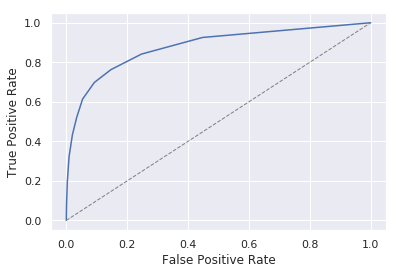

In [92]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [31]:
model.predict_proba(test_x)[0][:]

array([0.8, 0.2])

Feature ranking:
1. feature 1 (0.179994)
2. feature 2 (0.147427)
3. feature 5 (0.138731)
4. feature 0 (0.137059)
5. feature 3 (0.115585)
6. feature 4 (0.103127)
7. feature 7 (0.090837)
8. feature 6 (0.087240)


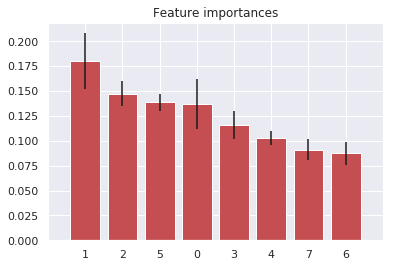

In [32]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

In [33]:
test_y.head()

36330    1
33820    0
27664    0
9392     0
6164     0
Name: Classifier, dtype: int64

In [34]:
submission = pd.DataFrame({
        "Pop": test_y,
        "Predicted": predicted
    })
#submission.to_csv('plot.csv', index=False)

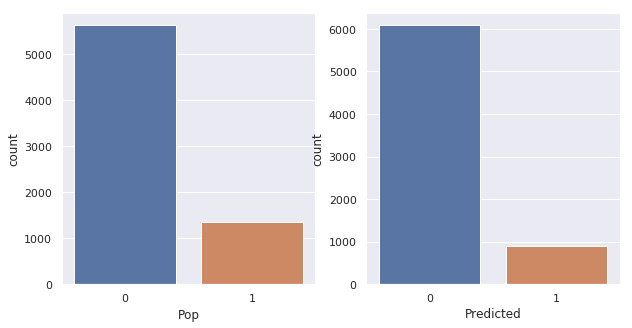

In [35]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))


a=sns.countplot(x='Pop', data=submission,ax=axis1)
sns.countplot(x='Predicted', data=submission,ax=axis2)
plt.show()

In [36]:
submission = pd.DataFrame({
        "Predicted": predicted
    })

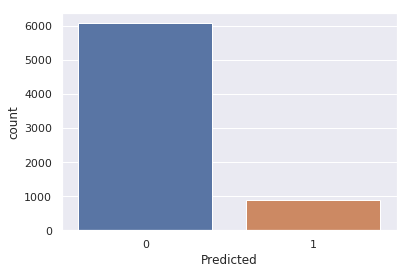

In [37]:
sns.countplot(x='Predicted', data=submission)
plt.show()

In [38]:
dfGaia = pd.read_csv('gaia7milion.csv')

In [39]:
dfGaia2=dfGaia[["l","b","parallax","pmra","pmdec","radial_velocity","phot_g_mean_mag","bp_rp"]]

In [40]:
dfGaia2.head()

,l,b,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,bp_rp
0,330.350313,-0.838107,-0.108158,-5.696558,-4.721763,-999.282616,18.083382,3.561571
1,277.710653,-33.694010,-0.048722,1.609151,0.097323,-987.492166,17.423346,1.388601
2,17.472077,-3.512395,0.043251,-1.918747,-2.489130,-986.247661,16.126408,2.218030
3,342.314096,-5.568968,0.987297,2.684643,2.938682,-984.274896,15.499906,1.148712
4,344.757653,-0.031937,0.794860,1.408253,-3.243735,-967.749688,16.207378,1.789083


In [41]:
dfGaia2bis=dfGaia2.dropna()

In [42]:
GaiaPredicted= model.predict(dfGaia2bis)

In [43]:
GaiaPredicted

array([0, 1, 0, ..., 0, 0, 0])

In [44]:
submission = pd.DataFrame({
        "GaiaPredicted": GaiaPredicted
    })

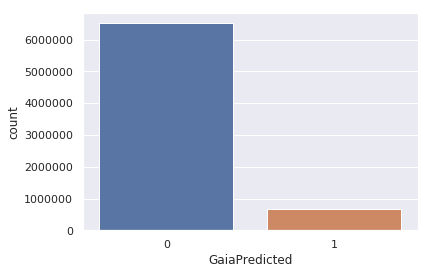

In [45]:
sns.countplot(x='GaiaPredicted', data=submission)
plt.show()

In [46]:
Gaia=dfGaia2bis+0

In [47]:
Gaia["Predicted"]=GaiaPredicted

In [48]:
Gaia.head()

,l,b,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,bp_rp,Predicted
0,330.350313,-0.838107,-0.108158,-5.696558,-4.721763,-999.282616,18.083382,3.561571,0
1,277.710653,-33.694010,-0.048722,1.609151,0.097323,-987.492166,17.423346,1.388601,1
2,17.472077,-3.512395,0.043251,-1.918747,-2.489130,-986.247661,16.126408,2.218030,0
3,342.314096,-5.568968,0.987297,2.684643,2.938682,-984.274896,15.499906,1.148712,1
4,344.757653,-0.031937,0.794860,1.408253,-3.243735,-967.749688,16.207378,1.789083,0


In [49]:
Gaia.to_csv('GaiadiscApogee.csv', index=False)

In [50]:
a=model.predict_proba(dfGaia2bis)

In [51]:
a[:,0]

array([0.6, 0.3, 0.7, ..., 0.6, 0.7, 0.5])

In [52]:
Gaia["Probability Thin"]=a[:,0]

In [53]:
Gaia["Probability Thick"]=a[:,1]

In [54]:
Gaia.head(1000)

,l,b,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,bp_rp,Predicted,Probability Thin,Probability Thick
0,330.350313,-0.838107,-0.108158,-5.696558,-4.721763,-999.282616,18.083382,3.561571,0,0.6,0.4
1,277.710653,-33.694010,-0.048722,1.609151,0.097323,-987.492166,17.423346,1.388601,1,0.3,0.7
2,17.472077,-3.512395,0.043251,-1.918747,-2.489130,-986.247661,16.126408,2.218030,0,0.7,0.3
3,342.314096,-5.568968,0.987297,2.684643,2.938682,-984.274896,15.499906,1.148712,1,0.4,0.6
4,344.757653,-0.031937,0.794860,1.408253,-3.243735,-967.749688,16.207378,1.789083,0,0.7,0.3
5,101.592275,1.117795,-0.001040,-2.108741,-1.341982,-928.003166,15.963890,2.333742,0,0.9,0.1
6,356.430608,2.202843,-0.113827,-2.806872,-2.067438,-923.240851,16.538240,4.100519,0,0.8,0.2
8,347.935114,-5.127963,0.190008,-2.915463,-1.166987,-902.270062,15.954334,1.861669,0,0.9,0.1
9,6.040800,-2.209154,-0.071059,-2.877545,-8.688171,-882.447460,15.768867,3.486489,1,0.4,0.6
10,348.022844,4.466457,-0.309524,-3.278509,-5.977536,-869.626355,17.410448,1.987592,1,0.3,0.7


In [55]:
Gaia.to_csv('GaiaRadialvelocity7milionApogee.csv', index=False)

In [56]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [57]:
num_folds = 10
num_instances = len(train_x)
np.random.seed(42)
seed=7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
models.append(('RFC',RandomForestClassifier()))


In [58]:
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

In [59]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=False, random_state=None)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/hpc/calixto/rmor/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR: 0.850387 (0.004469)
LDA: 0.836809 (0.004680)
KNN: 0.847951 (0.005968)
CART: 0.837238 (0.002277)
NB: 0.839890 (0.005566)
RFC: 0.882058 (0.002234)


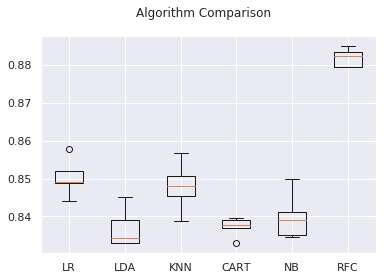

In [60]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()